In [1]:
from final import *
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
*The raw code for this Jupyter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

/Users/jenniferarty/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/jenniferarty/Desktop/projects/wine-reviews/final.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['Gen_Label'] = category_labels


# Wine analysis by price, country and reviews

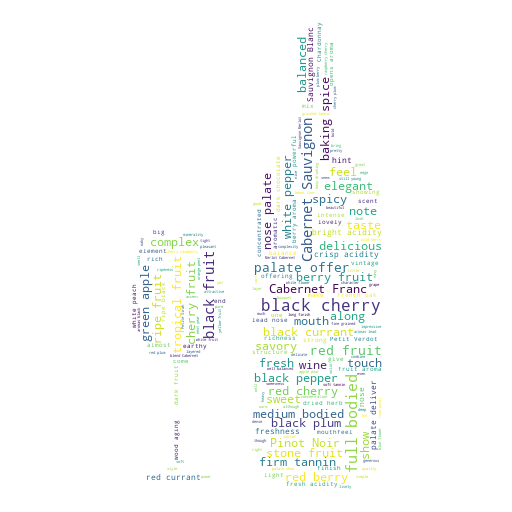

In [7]:
from os import path
from PIL import Image
wine_mask = Image.open("wine.png")
wine_mask

In [2]:
frame_1=[df_10, df_10_other]
total_wines =pd.concat(frame_1)
# total_wines

In [3]:
df_states = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
df_states = pd.DataFrame(df_states['state'])
state_numbers = df_10['state_1'].value_counts()

dict_state= state_numbers.to_dict()
df_states['counts']=df_states['state'].map(dict_state,0)
df_states.loc[4, 'counts'] = 35683
df_states=df_states.fillna(0)

# DataFrame

In [24]:
final_wine.head()

,old_index_1,country_1,description_1,points_1,price_1,state_1,region_1_1,region_2_1,title_1,variety_1,...,écluse,édition,élevage,élévage,émilion,étoile,été,über,überaromatic,überbest
0,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Napa,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,US,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Sonoma,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Wine production by State

In [4]:
import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
scl = [[0.0, 'rgb(242,240,247)'],[0.01, 'rgb(218,218,235)'],[0.05, 'rgb(188,189,220)'],\
           [0.10, 'rgb(158,154,200)'],[0.15, 'rgb(117,107,177)'],[.67, 'rgb(84,39,143)']]



df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.000001, 'rgb(218,218,235)'],[0.0005, 'rgb(188,189,220)'],\
           [0.1, 'rgb(158,154,200)'],[0.15, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# df_10['text'] = df_10['state_1']


data = [ dict(
       type='choropleth',
        colorscale = scl,
       autocolorscale = False,
       locations = df['code'],
       z = df_states['counts'],
       locationmode = 'USA-states',
#         text = df['text'],
       marker = dict(
           line = dict (
               color = 'rgb(255,255,255)',
               width = 2
           )
       ),
       colorbar = dict(
           title = "# Wines"
       )
   ) ]

layout = dict(
       title = 'Wine Concentration by State<br>(Hover for breakdown)',
       geo = dict(
           scope='usa',
           projection=dict( type='albers usa' ),
           showlakes = True,
           lakecolor = 'rgb(255, 255, 255)',
       ),
   )

fig = dict( data=data, layout=layout )

url = iplot( fig, filename='d3-cloropleth-map' )

# Wine average by country from around the world

In [5]:
avg_price_other = total_wines.groupby('category_1').mean()
avg_price_other=avg_price_other[['points_1','price_1']]

In [6]:
avg_country = total_wines.groupby('country_1').mean()
avg_country

,old_index_1,points_1,price_1,state_label_1,cat_label_1
country_1,,,,,
Argentina,65022.683754,86.717657,24.535395,19.860862,6.136425
Australia,65087.740133,88.581818,35.102882,28.989800,7.850111
Canada,71346.991150,89.340708,33.734513,11.053097,9.398230
France,64932.738698,88.735445,41.652586,10.896804,7.614643
Italy,64132.719662,88.685515,40.801317,29.510134,5.275045
Spain,64580.992581,87.280728,27.944866,17.622323,5.251560
US,65451.810327,88.594526,36.801724,7.396721,6.758071


# Wine category by Country

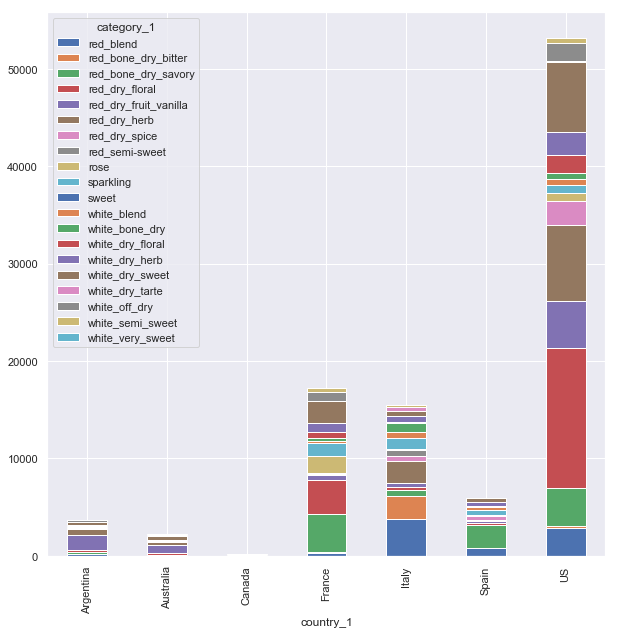

In [7]:


frame_1=[df_10,df_10_other]
total= pd.concat(frame_1)
graph_total=pd.crosstab(total.country_1,total.category_1)
# plt.figure(figsize=(100,100))
sns.set()

graph_total.plot.bar(stacked=True, figsize=(10,10))

plt.show()

 # Relationship between wine points and price by country

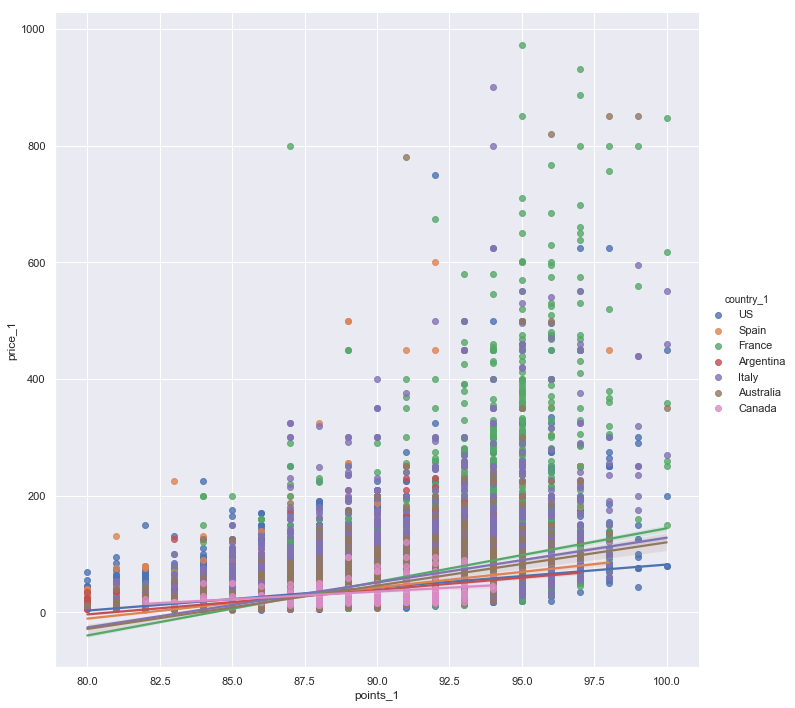

In [8]:
import seaborn as sns
sns.set()

# Load the iris dataset


# Plot sepal with as a function of sepal_length across days
no_outliers= total[total['price_1']<1000]

sns.lmplot(x="points_1", y="price_1", hue="country_1",fit_reg=True,
               truncate=True, height=10, data=no_outliers)


# Wine ratings between US and other Countries

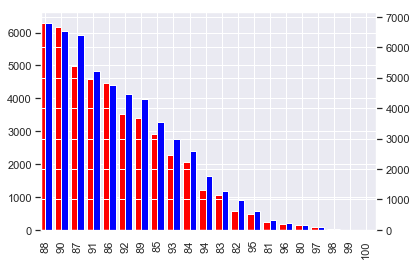

In [9]:
others_reviews =df_10_other.points_1.value_counts()
us_reviews=df_10.points_1.value_counts()

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
others_reviews.plot(kind='bar', color='red', ax=ax, width=width, position=1)
us_reviews.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

# Wine price point comparing US and other Countries

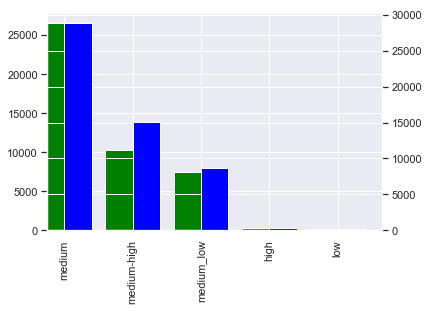

In [10]:
y= df_10['points_1']

pb= pd.cut(y,bins=[75,80,85,90,95,100],labels=['low','medium_low','medium','medium-high','high'],include_lowest=True)
df_10['points_bin']= pb

z= df_10_other['points_1']

pbo= pd.cut(z,bins=[75,80,85,90,95,100],labels=['low','medium_low','medium','medium-high','high'],include_lowest=True)
df_10_other['points_bin']= pbo

others_rating =df_10_other.points_bin.value_counts()
us_rating=df_10.points_bin.value_counts()

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
others_rating.plot(kind='bar', color='green', ax=ax, width=width, position=1)
us_rating.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

# Correlation between price and points - US by State

Pearson Correlation: (1.0, 0.0)
                            OLS Regression Results                            
Dep. Variable:               points_1   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                 1.034e+05
Date:                Tue, 14 Aug 2018   Prob (F-statistic):               0.00
Time:                        15:46:51   Log-Likelihood:            -2.8491e+05
No. Observations:               53123   AIC:                         5.698e+05
Df Residuals:                   53122   BIC:                         5.698e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price_1        1.573

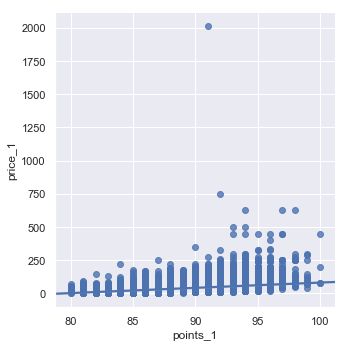

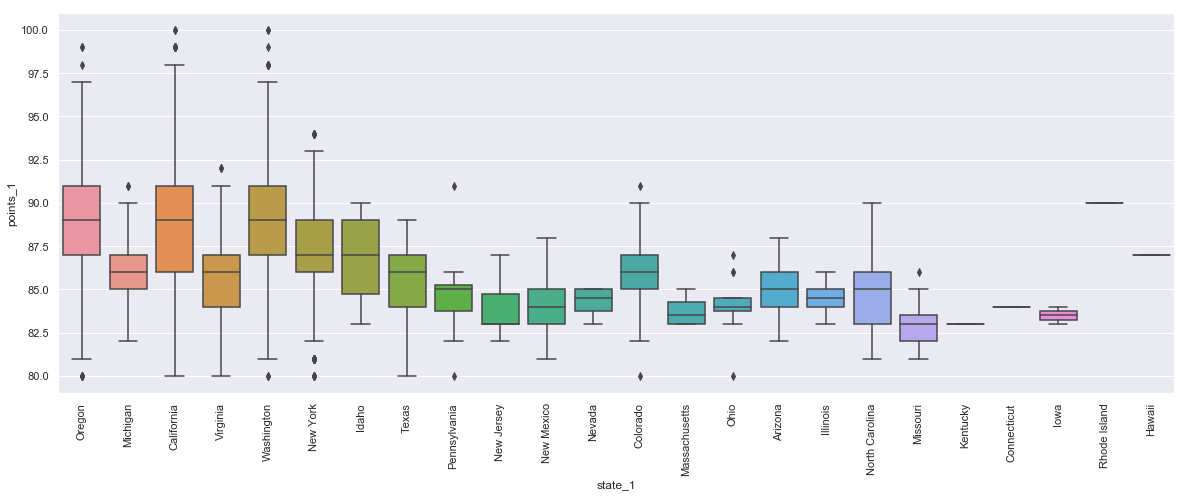

In [12]:
#Get possible correlation between price and points
from scipy.stats import pearsonr
import statsmodels.api as sm
print("Pearson Correlation:", pearsonr(df_10.price_1, df_10.price_1))
print(sm.OLS(df_10.points_1, df_10.price_1).fit().summary())
sns.lmplot(y = 'price_1', x='points_1', data=df_10)
##distribution of points by state
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='state_1',y='points_1', data=df_10, ax = ax)
plt.xticks(rotation = 90)
plt.show()

# Correlation between price and points - other Countries by region

Pearson Correlation: (1.0, 0.0)
                            OLS Regression Results                            
Dep. Variable:               points_1   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                 2.239e+04
Date:                Tue, 14 Aug 2018   Prob (F-statistic):               0.00
Time:                        15:46:59   Log-Likelihood:            -2.5529e+05
No. Observations:               44801   AIC:                         5.106e+05
Df Residuals:                   44800   BIC:                         5.106e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price_1        0.764

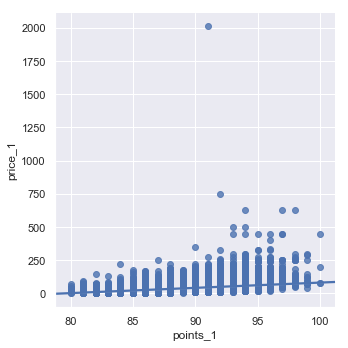

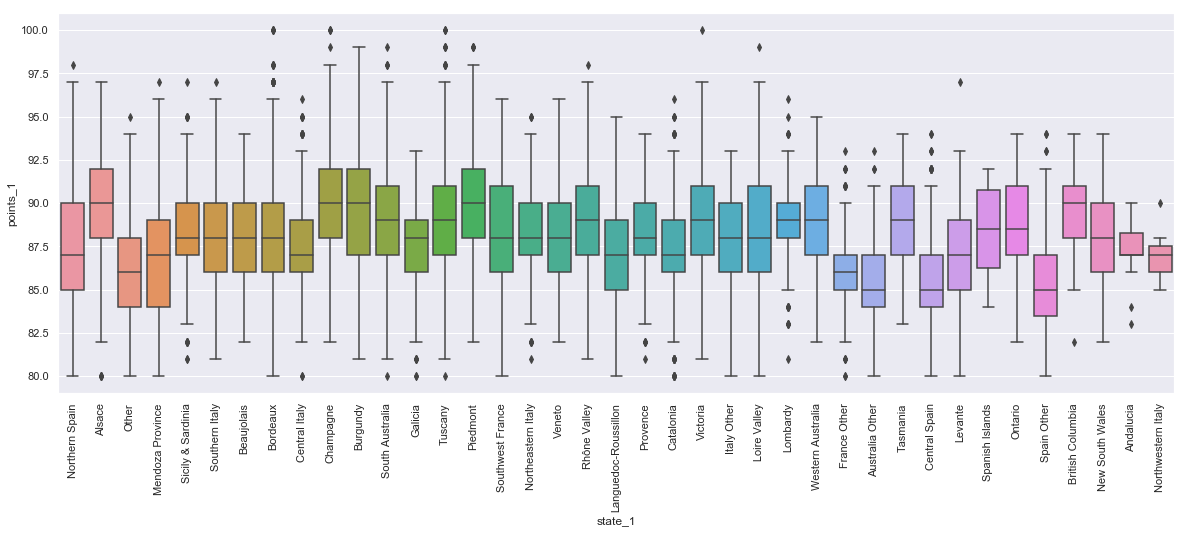

In [13]:
#Get possible correlation between price and points



from scipy.stats import pearsonr
import statsmodels.api as sm
print("Pearson Correlation:", pearsonr(df_10_other.price_1, df_10_other.price_1))
print(sm.OLS(df_10_other.points_1, df_10_other.price_1).fit().summary())
sns.lmplot(y = 'price_1', x='points_1', data=df_10)
##distribution of points by state
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='state_1',y='points_1', data=df_10_other, ax = ax)
plt.xticks(rotation = 90)
plt.show()

# Price and type of wine- US 

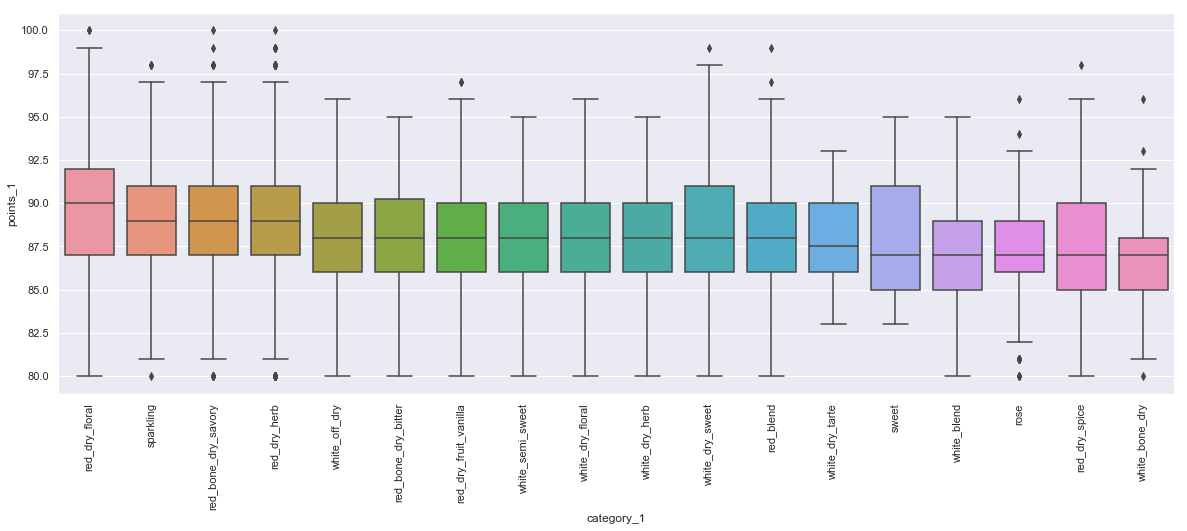

In [14]:
##more distinct segmentation once you get rid of the states with less than 10 reviews

states=df_10.groupby('category_1').filter(lambda x: len(x) >10)
df2 = pd.DataFrame({col:vals['points_1'] for col,vals in states.groupby('category_1')})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='category_1',y='points_1', data=states, order=meds.index, ax = ax)
plt.xticks(rotation = 90)

plt.show()

# Price and type of wine- Other Countries 

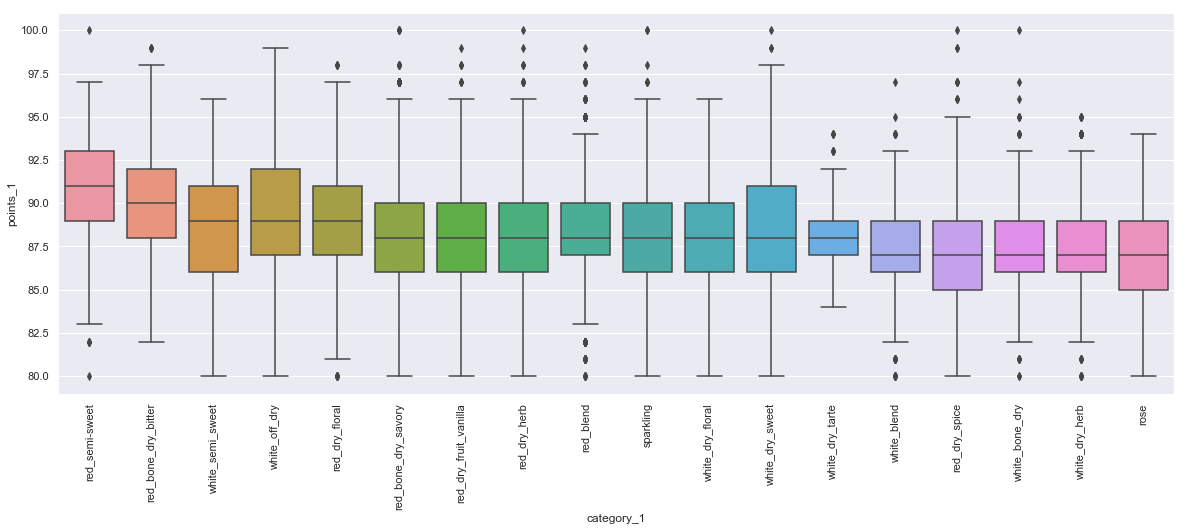

In [15]:
states2=df_10_other.groupby('category_1').filter(lambda x: len(x) >10)
df22 = pd.DataFrame({col:vals['points_1'] for col,vals in states2.groupby('category_1')})
meds2 = df22.median()
meds2.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='category_1',y='points_1', data=states2, order=meds2.index, ax = ax)
plt.xticks(rotation = 90)

plt.show()

# Average Wine price by State -US 

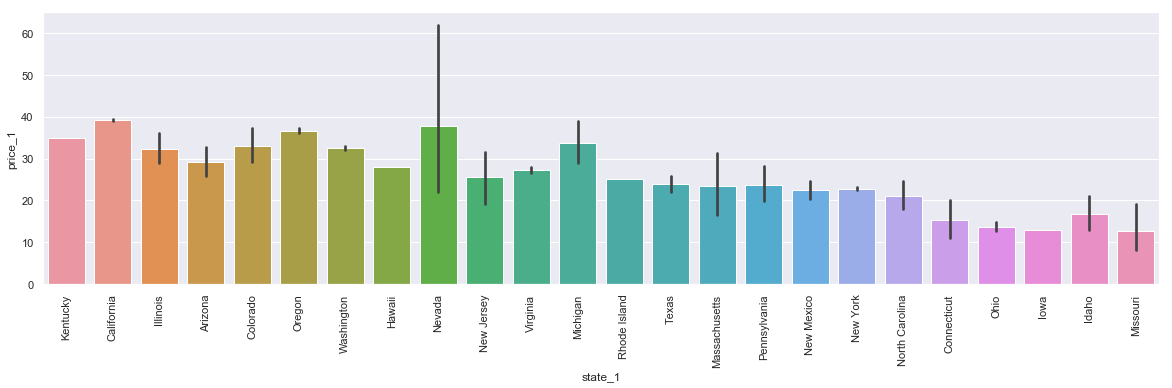

In [16]:
### plot mean price sorted by states in us
##Below are the average wine prices sorted by median (highest to lowest) in order to evaluate price distortions due to outliers.

df3 = pd.DataFrame({col:vals['price_1'] for col,vals in states.groupby('state_1')})
meds2 = df3.median()
meds2.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,5))
chart = sns.barplot(x='state_1',y='price_1', data=states, order=meds2.index, ax = ax)
plt.xticks(rotation = 90)
plt.show()

# Average Wine price by region- Other Countries 

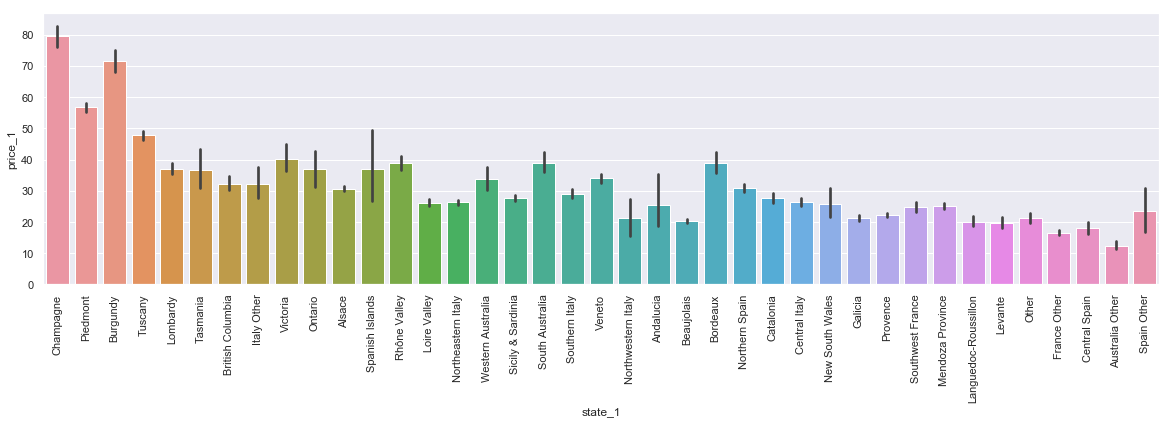

In [17]:
df33 = pd.DataFrame({col:vals['price_1'] for col,vals in states2.groupby('state_1')})
meds22 = df33.median()
meds22.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,5))
chart = sns.barplot(x='state_1',y='price_1', data=states2, order=meds22.index, ax = ax)
plt.xticks(rotation = 90)
plt.show()

# Points spread by wine Category - US

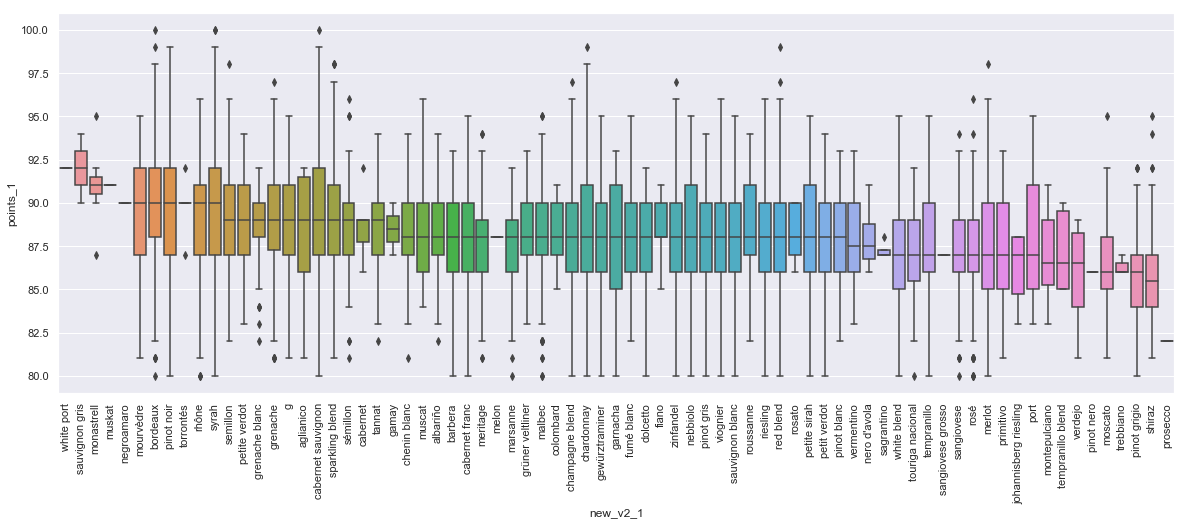

In [18]:
##BOXPLOT OF POINTS GROUPED BY WINE VARIETIES THAT OCCUR MORE THAN 200 TIMES

variety_groups1 = df_10.groupby('new_v2_1').filter(lambda x: len(x) >200)

df4 = pd.DataFrame({col:vals['points_1'] for col,vals in df_10.groupby('new_v2_1')})
meds3 = df4.median()
meds3.sort_values(ascending=False, inplace=True)

fig3, ax3 = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='new_v2_1',y='points_1', data=df_10, order=meds3.index, ax = ax3)
plt.xticks(rotation = 90)
plt.show()

In [47]:
# variety_groups12 = df_10_other.groupby('new_v2_1').filter(lambda x: len(x) >200)

# df42 = pd.DataFrame({col:vals['points_1'] for col,vals in df_10_other.groupby('new_v2_1')})
# meds32 = df42.median()
# meds32.sort_values(ascending=False, inplace=True)

# fig3, ax3 = plt.subplots(figsize = (20,7))
# chart = sns.boxplot(x='new_v2_1',y='points_1', data=df_10_other, order=meds32.index, ax = ax3)
# plt.xticks(rotation = 90)
# plt.show()

# Average Wine price by Wine type - US

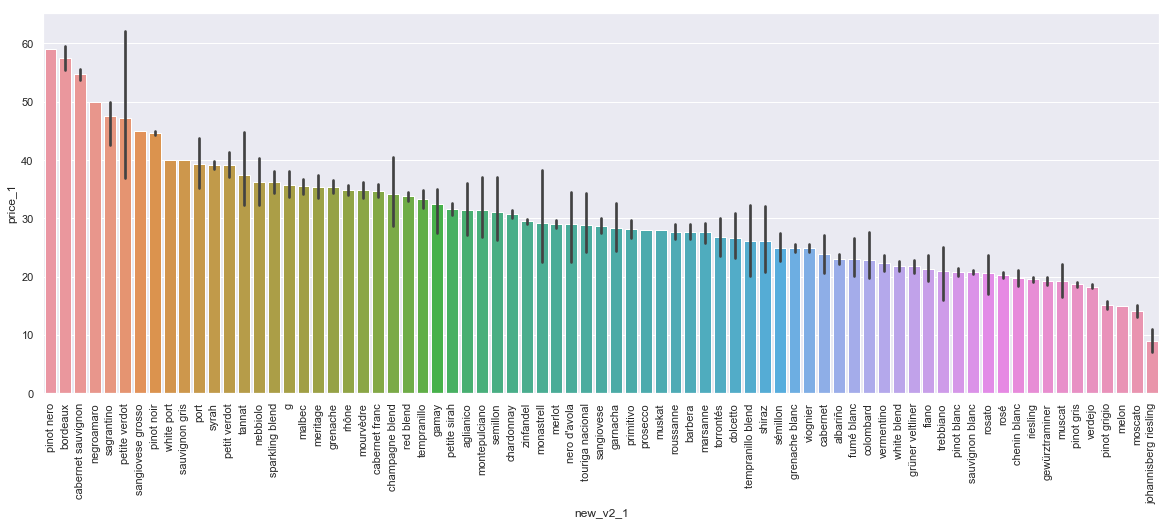

In [19]:
df6 = pd.DataFrame({col:vals['price_1'] for col,vals in df_10.groupby('new_v2_1')})
mean2 = df6.mean()
mean2.sort_values(ascending=False, inplace=True)

fig3, ax3 = plt.subplots(figsize = (20,7))
chart = sns.barplot(x='new_v2_1',y='price_1', data=df_10, order=mean2.index, ax = ax3)
plt.xticks(rotation = 90)
plt.show()

# Average Wine price by Wine type - Other Countries 

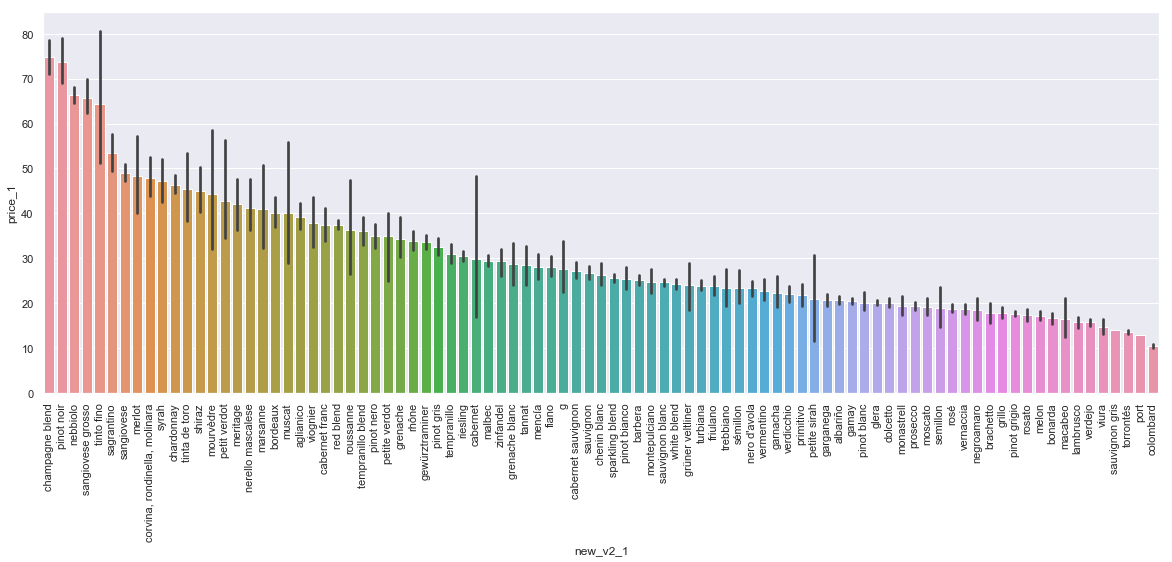

In [20]:
df62 = pd.DataFrame({col:vals['price_1'] for col,vals in df_10_other.groupby('new_v2_1')})
mean22 = df62.mean()
mean22.sort_values(ascending=False, inplace=True)

fig3, ax3 = plt.subplots(figsize = (20,7))
chart = sns.barplot(x='new_v2_1',y='price_1', data=df_10_other, order=mean22.index, ax = ax3)
plt.xticks(rotation = 90)
plt.show()

# Modeling: Logistic Regression: Predicting price group based on Description - US

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
import random
random.seed(0)
from keras import regularizers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Activation


/Users/jenniferarty/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/jenniferarty/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(category)
category_cat = le.transform(category)
category_cat
category_onehot =to_categorical(category_cat)
category_onehot

In [10]:

model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(19056,))) 
model.add(Dense(50,activation='relu'))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_val = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_test, y_test))

Train on 39842 samples, validate on 13281 samples
Epoch 1/100


ValueError: could not convert string to float: 'cheap'

36862    medium
50680       low
35989    medium
32557       low
39082       low
18837    medium
39489       low
27115       low
12337       low
26458       low
541       cheap
38428       low
29077     cheap
1691        low
51956     cheap
33665       low
19883    medium
12563     cheap
52156       low
10146       low
18070       low
39554       low
32803     cheap
50457    medium
15166     cheap
21870       low
43760      high
44633    medium
14255       low
45142       low
          ...  
24931       low
3188      cheap
4720        low
4115        low
29358    medium
792         low
38694    medium
32412    medium
13333       low
975         low
28303       low
1829     medium
16468     cheap
33838    medium
43076     cheap
417      medium
2090        low
18968       low
51946     cheap
10984     cheap
7834     medium
10996       low
32581    medium
47417       low
17820     cheap
11539       low
10005       low
28350       low
50471    medium
45168       low
Name: price_1, Length: 3

In [2]:
from sklearn.model_selection import train_test_split
def binning(col, cut_points, labels=None):
#Define min and max values:
    minval = col.min()
    maxval = col.max()

#create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]

#if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)

#Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin
#Binning prices:
cut_points = [15,40,100]
labels = ['cheap',"low","medium","high"]
prices = binning(df_10['price_1'], cut_points, labels)
print(pd.value_counts(prices, sort=False))
#get train and test set
x_train, x_test, y_train, y_test = train_test_split(get_vect, prices)
#FIT LOGISTIC REGRESSION MODEL IN TRAINING DATA

from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(x_train, y_train)
#GET PREDICTIONS FOR EACH CLASS WITH THEIR PROBABILITIES
prediction = model.predict_proba(x_test)
prediction
prediction2 = model.predict(x_test)
prediction2
#GET ACCURACY
from sklearn import metrics
metrics.accuracy_score(y_test, prediction2)
comparison = pd.DataFrame({'actual':y_test, 'predicted':prediction2})

print('Accuracy Score:',metrics.accuracy_score(comparison.actual, comparison.predicted)*100,"%")
comparison

cheap      6460
low       30383
medium    15248
high       1032
Name: price_1, dtype: int64
Accuracy Score: 66.14712747534071 %


,actual,predicted
20803,cheap,low
5772,low,low
37917,medium,low
31121,low,low
39602,medium,medium
12564,low,low
40279,cheap,cheap
3421,cheap,low
14278,medium,medium
10944,low,medium


# Modeling: Logistic Regression: Predicting price group based on Description - Other Countries 

In [3]:
cut_points = [15,40,100]
labels = ['cheap',"low","medium","high"]
prices2 = binning(df_10_other['price_1'], cut_points, labels)
print(pd.value_counts(prices2, sort=False))
#get train and test set
x_train2, x_test2, y_train2, y_test2 = train_test_split(get_vect_other, prices2)
#FIT LOGISTIC REGRESSION MODEL IN TRAINING DATA

from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(x_train2, y_train2)
#GET PREDICTIONS FOR EACH CLASS WITH THEIR PROBABILITIES
prediction2 = model.predict_proba(x_test2)
prediction2
prediction22 = model.predict(x_test2)
prediction22
#GET ACCURACY
from sklearn import metrics
metrics.accuracy_score(y_test2, prediction22)
comparison2 = pd.DataFrame({'actual':y_test2, 'predicted':prediction22})

print('Accuracy Score:',metrics.accuracy_score(comparison2.actual, comparison2.predicted)*100,"%")
comparison2

cheap     10823
low       22192
medium     9787
high       1999
Name: price_1, dtype: int64
Accuracy Score: 61.35166502990804 %


,actual,predicted
3259,low,low
16846,medium,medium
3681,medium,low
4762,low,low
25414,medium,low
8090,cheap,low
42482,medium,low
18019,low,low
7744,medium,low
2781,cheap,low
